## Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
#here we save tha path of my data
files =  [file for file in os.listdir("/home/monky/Descargas/ciencia_datos/Sales_Data_Analysis/Sales_Data")]#here we create a list with a loop that goes through all data in this path 
for file in files:#here we create a loop that goes through my list of file
    print(file)#here we imprint every file 

Sales_December_2019.csv
Sales_June_2019.csv
Sales_May_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
all_data.csv
Sales_October_2019.csv
Sales_August_2019.csv
Sales_July_2019.csv
Sales_November_2019.csv
Sales_February_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv


In [4]:
# here we convert my data to a dataframe and display all those columns and rows, with "shape"
path = "/home/monky/Descargas/ciencia_datos/Sales_Data_Analysis/Sales_Data"#here we create a varible path
all_data = pd.DataFrame()#here create a dataframe
for file in files:
    current_df = pd.read_csv(path+"/"+file)#here we concatenate mi path and mi file
    all_data = pd.concat([all_data, current_df])## and here we convert my data to a dataframe (and save it in the variable all_data)
    

all_data.shape#here we see all columns and rows for shape

(2429050, 6)

In [5]:
#here we convert mi data in a csv
all_data.to_csv("/home/monky/Descargas/ciencia_datos/Sales_Data_Analysis/Sales_Data/all_data.csv",index = False)

In [6]:
# here we can see the result
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Analyze sales over the months and see which month is the best in sales

In [7]:
#first you need to know if you are missing data
all_data.isnull().sum()#here we sum al missing data of all columns 

Order ID            7085
Product             7085
Quantity Ordered    7085
Price Each          7085
Order Date          7085
Purchase Address    7085
dtype: int64

In [8]:
# here we delete everything that is missing with dropna, with the parameter how = "all"
all_data = all_data.dropna(how = "all")

In [9]:
#here we can see the results 
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
#here delete everything number after "/" and we only leave 12
"12/30/19 00:01".split("/")[0]# here we specify what number we want (if you want 30, put [1] instead of [0])

'12'

In [11]:
#here we create a simple function
def month(x):
    return x.split("/")[0]#this returns the month (or in other words, the first numbers before "/")

In [12]:
# here we have the column of the month with the month of each sale
all_data["month"] = all_data["Order Date"].apply(month)

In [13]:
#here we can see the result 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [14]:
# here we can see that there is an unexpected value in my column month (Order Date)
all_data["month"].unique()

array(['12', 'Order Date', '01', '06', '07', '05', '02', '03', '04', '08',
       '09', '11', '10'], dtype=object)

In [15]:
# here we delete that unexpected value
filter = all_data["month"] == "Order Date"#here we create a "filter"(that is the value "Order Date" in the column month)
all_data = all_data[-filter]#Here and here we use our filter.
all_data.head()#here we can see the result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [16]:
# here we see what type of data is in each column
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [17]:
#here convert to int a column month
all_data["month"] = all_data["month"].astype(int)

In [18]:
#here we can see the result
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

In [19]:
#here we convert a Quantity Ordered in init too 
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype(int)
#here we convert a Price Each in a float
all_data["Price Each"] = all_data["Price Each"].astype(float)

In [20]:
#here we can see the result
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [21]:
# here we create a column "sales" to represent the money earned in a month 
all_data["sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]# here we multiply the "Price each" by the "Quantity ordered"

In [22]:
#here we can see the result
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [23]:
#here we agrup the month and the sales
all_data.groupby("month")["sales"].sum()

month
1     2.368934e+07
2     2.862629e+07
3     3.649230e+07
4     4.407871e+07
5     4.098389e+07
6     3.351143e+07
7     3.442108e+07
8     2.917808e+07
9     2.726828e+07
10    4.857745e+07
11    4.159484e+07
12    5.997476e+07
Name: sales, dtype: float64

Text(0, 0.5, 'Sales in USD')

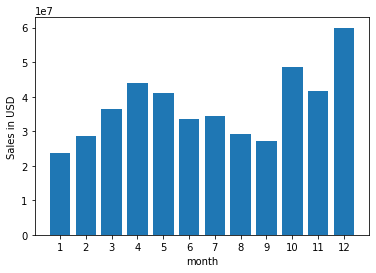

In [24]:
# here we create a graph to see how much money you made in a month
months = range (1, 13)#here we create a variable with a range of 1 to 13 (the month 1 to the month 12) 

#here we create the graph with my variable month and with the group of my columns (month and sales)
plt.bar(months, all_data.groupby("month")["sales"].sum())
plt.xticks(months)

plt.xlabel("month")# here we create a name for the x-axis
plt.ylabel("Sales in USD")#here we create a name for the y-axis

## Which city has max order

In [25]:
#first we see our data frame
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [26]:
#now now we need to separate the city from the other data in my column "Purchase address"
"136 Church St, New York City, NY 10001".split(",")[1]#We use the split function and we pass it as a parameter the commas (,) and we ask for the return of the second value [1] (yes, 1 is the second value by 0)

' New York City'

In [27]:
#now we create(city) a function to automate this
def city(x):
    return x.split(",")[1]

In [28]:
#now we use the city function a city column 
all_data["city"] = all_data["Purchase Address"].apply(city)

In [29]:
#here we can see tr results
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


<AxesSubplot:xlabel='city'>

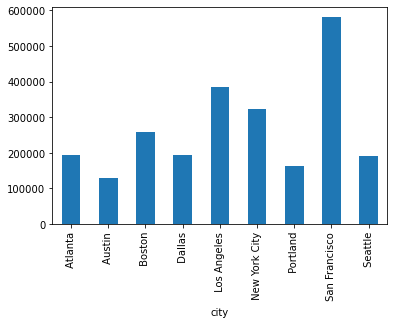

In [30]:
#Now we make a graph to see in which city to buy more.
#basically we join the name of the city with the count of times it appears in my dataframe
all_data.groupby("city")["city"].count().plot.bar()

## At what time are product purchase sales maximum?

In [31]:
#here we can see that column "Order Date" is not a date type
all_data["Order Date"].dtype

dtype('O')

In [32]:
# so we create a column "Time", we use the data of the "Order Date" but we convert the data to the date type
# and only use the hour not date of day
all_data["Hour"] = pd.to_datetime(all_data["Order Date"]).dt.hour

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [34]:
#here we create two list, "keys" is for hour of the day and"Hour" have the len of the hour_df
keys = []
hour = []
#here we fill in those lists
for key,hour_df in all_data.groupby("Hour"):
    keys.append(key)
    hour.append(len(hour_df))

In [35]:
#here we can see the result
hour

[50830,
 30550,
 16159,
 10803,
 11102,
 17173,
 32266,
 52143,
 81328,
 113724,
 142272,
 161343,
 163631,
 157677,
 142792,
 132275,
 134992,
 141687,
 159640,
 167765,
 158964,
 141973,
 114686,
 81575]

In [36]:
#here we can see the result
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

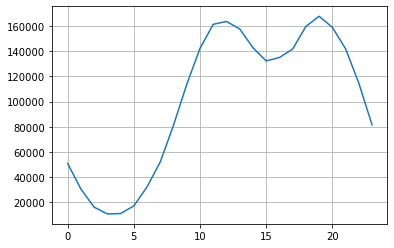

In [37]:
#and here we make a graph with my data
plt.grid()#here we customize a graphic
plt.plot(keys,hour)#here create a graph

## Which product sold the most and why

<AxesSubplot:xlabel='Product'>

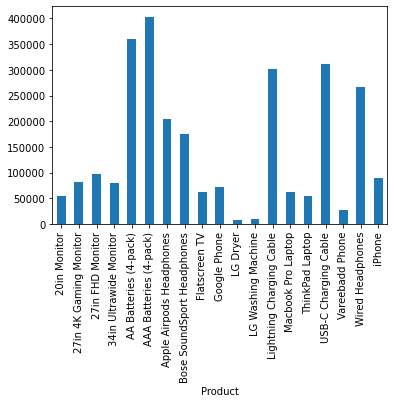

In [38]:
# here we group products with the quantity ordered, and sum the data
#after creating a chart with this data
all_data.groupby("Product")["Quantity Ordered"].sum().plot(kind = "bar")

In [42]:
#here we group the Product data and the Price Each data
#we this data and the function "mean" we can calculate the median Price Each product
all_data.groupby("Product")["Price Each"].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [44]:
# here we group the requested quantity data with the product name data, and convert into an index
products = all_data.groupby("Product")["Quantity Ordered"].sum().index
# here we group the requested quantity data with the product name data
quantity = all_data.groupby("Product")["Quantity Ordered"].sum()
#here we group the Price Each product data with the product name 
prices = all_data.groupby("Product")["Price Each"].mean()


<ipython-input-40-8732a33aa584>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = "vertical", size = 8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

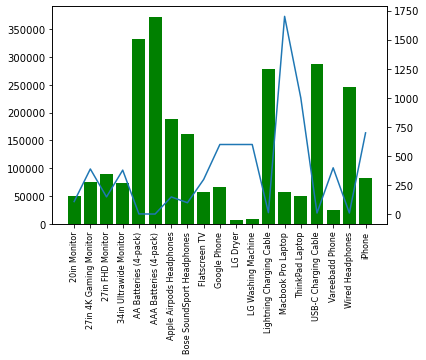

In [40]:
#here we create a grahp 
fig,ax1 = plt.subplots()

#here we create a 2xis, this is a copy of the 1xis but this uses the twinx () function, this function can make two data coexist at the same index
ax2 = ax1.twinx()

#here we the agroup the name products(in the axis x, like a index) with the Quantity Ordered(in the axis y) 
ax1.bar(products,quantity, color = "g")#with "g" we set the color of the graph in green 

#here we the agroup the name products(in the axis x, like a index) with the prices(in the axis y) 
ax2.plot(products, prices)

#here we set the index(name products) vertically (horizontally it doesn't look good)
ax1.set_xticklabels(products, rotation = "vertical", size = 8)

## What products are most often sold together 

In [41]:

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [42]:
df = all_data["Order ID"].duplicated(keep = False)

df2 = all_data[df]

df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [43]:
#here we create a new column in my datafrae "Grouped" this columns agroup a the products purchased in the same purchase 
df2["Grouped"] = df2.groupby("Order ID")["Product"].transform(lambda x:",".join(x))

In [44]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,"Macbook Pro Laptop,Macbook Pro Laptop,Macbook ..."
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,"LG Washing Machine,LG Washing Machine,LG Washi..."
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [2]:
#here delete the duplicates ids in sort datafram
df2 = df2.drop_duplicates(subset = ["Order ID"])
#here we see the result
df2.head()

NameError: name 'df2' is not defined

In [1]:
#here we agroup value_counts() in the column "Grouped"
df2["Grouped"].value_counts()

NameError: name 'df2' is not defined

<AxesSubplot:ylabel='Grouped'>

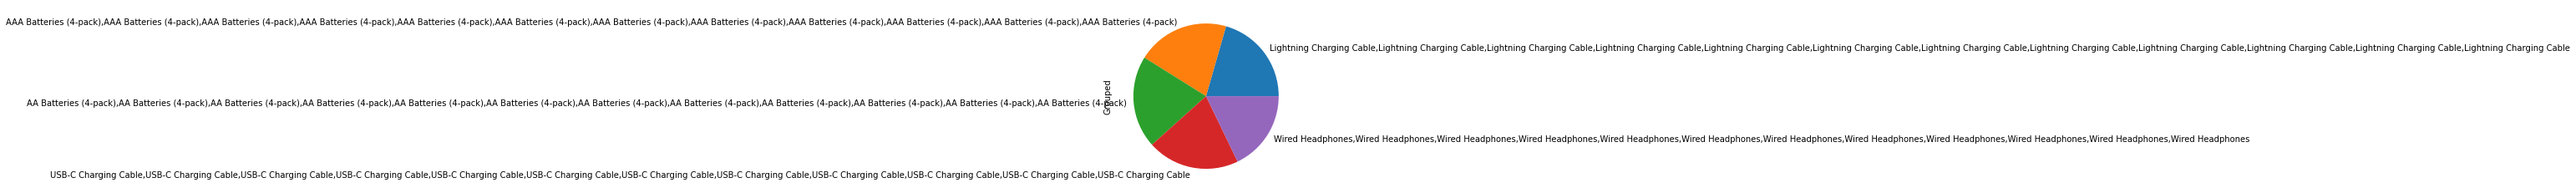

In [47]:
#here we create a graph with the top 5 shopping together
df2["Grouped"].value_counts()[0:5].plot.pie()